In [5]:
import numpy as np
import sys,os
#os.system('echo $PYTHONPATH')
sys.path.append('/home/helen/analysis/Pylians3/library/build/lib.linux-x86_64-3.8')
import Pk_library as PKL

ModuleNotFoundError: No module named 'Pk_library.Pk_library'

In [ ]:
################################# INPUT #####################################
BoxSize = 75.0 #Mpc/h
MAS     = 'CIC'
threads = 1
f1 = 'HI_Full_Predicted_5.npy'
f2 = 'HI_Full_True.npy'
#############################################################################

# read HI maps
delta_HI_pred = np.load(f1);  #this is delta_HI
delta_HI_true = np.load(f2);  #this is delta_HI
print(delta_HI_pred.shape)
print(delta_HI_true.shape)
print(np.min(delta_HI_true),np.max(delta_HI_true),np.mean(delta_HI_true))
print(np.min(delta_HI_pred),np.max(delta_HI_pred),np.mean(delta_HI_pred))

In [ ]:
# compute power spectra
Pk = PKL.Pk_plane(delta_HI_true, BoxSize, MAS, threads)
np.savetxt('Pk_log_true.txt', np.transpose([Pk.k, Pk.Pk]))

Pk = PKL.Pk_plane(delta_HI_pred, BoxSize, MAS, threads)
np.savetxt('Pk_log_pred.txt', np.transpose([Pk.k, Pk.Pk]))

Pk = PKL.Pk_plane(np.exp(delta_HI_true), BoxSize, MAS, threads)
np.savetxt('Pk_true.txt', np.transpose([Pk.k, Pk.Pk]))

Pk = PKL.Pk_plane(np.exp(delta_HI_pred), BoxSize, MAS, threads)
np.savetxt('Pk_pred.txt', np.transpose([Pk.k, Pk.Pk]))

In [ ]:
# compute HI PDFs
rho_HI_pred = 1.0+delta_HI_pred
rho_HI_true = 1.0+delta_HI_true
print('%.3e < rho_HI_pred < %.3e'%(np.min(rho_HI_pred),np.max(rho_HI_pred)))
print( '%.3e < rho_HI_true < %.3e'%(np.min(rho_HI_true),np.max(rho_HI_true)))
bins  = np.linspace(0,12,30)
dbins = bins[1:] - bins[:-1]
mean_bins = 0.5*(bins[1:] + bins[:-1])
pdf_HI_pred = np.histogram(rho_HI_pred, bins=bins)[0]/dbins
pdf_HI_true = np.histogram(rho_HI_true, bins=bins)[0]/dbins

np.savetxt('pdf_HI_pred.txt', np.transpose([mean_bins, pdf_HI_pred]))
np.savetxt('pdf_HI_true.txt', np.transpose([mean_bins, pdf_HI_true]))


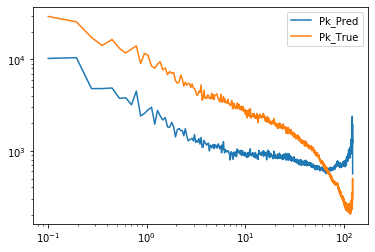

In [81]:
# PK_Pred
pk_pred_x = np.zeros((1448, 1), dtype=np.float32)
pk_pred_x = np.loadtxt('Pk_pred.txt', usecols=0)

pk_pred_y = np.zeros((1448, 1), dtype=np.float32)
pk_pred_y = np.loadtxt('Pk_pred.txt', usecols=1)

# PK_True
pk_true_x = np.zeros((1448, 1), dtype=np.float32)
pk_true_x = np.loadtxt('Pk_true.txt', usecols=0)

pk_true_y = np.zeros((1448, 1), dtype=np.float32)
pk_true_y = np.loadtxt('Pk_true.txt', usecols=1)

# Plot
# PK_Log
import matplotlib.pyplot as plt
plt.plot(pk_pred_x, pk_pred_y, label="Pk_Pred")
plt.plot(pk_true_x, pk_true_y, label='Pk_True')
plt.xscale('log')
plt.yscale('log')
#plt.text(8, 20, 'MSE = %.4f'%(np.mean((pk_true_y - pk_pred_y)**2)))
plt.legend()

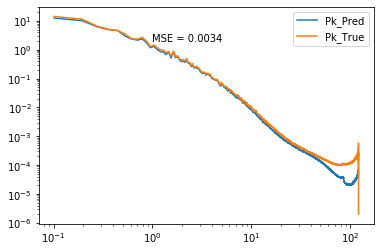

In [82]:
# PK_Pred_log
pk_pred_x = np.zeros((1448, 1), dtype=np.float32)
pk_pred_x = np.loadtxt('Pk_log_pred.txt', usecols=0)

pk_pred_y = np.zeros((1448, 1), dtype=np.float32)
pk_pred_y = np.loadtxt('Pk_log_pred.txt', usecols=1)

# PK_True_log 
pk_true_x = np.zeros((1448,1), dtype=np.float32)
pk_true_x = np.loadtxt('Pk_log_true.txt', usecols=0)

pk_true_y = np.zeros((1448, 1), dtype=np.float32)
pk_true_y = np.loadtxt('Pk_log_true.txt', usecols=1)

# PK_Log Plot
import matplotlib.pyplot as plt
plt.plot(pk_pred_x, pk_pred_y, label="Pk_Pred")
plt.plot(pk_true_x, pk_true_y, label='Pk_True')
plt.xscale('log')
plt.yscale('log')
plt.text(1, 2, 'MSE = %.4f'%(np.mean((pk_true_y - pk_pred_y)**2)))
plt.legend()

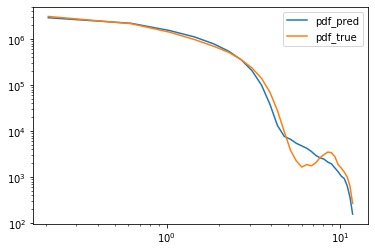

In [49]:
# PDF_PRED
pdf_pred_x = np.zeros((29, 1), dtype=np.float32)
pdf_pred_x = np.loadtxt('pdf_HI_pred.txt', usecols=0)

pdf_pred_y = np.zeros((29, 1), dtype=np.float32)
pdf_pred_y = np.loadtxt('pdf_HI_pred.txt', usecols=1)

# PDF_TRUE
pdf_true_x = np.zeros((29,1), dtype=np.float32)
pdf_true_x = np.loadtxt('pdf_HI_true.txt', usecols=0)

pdf_true_y = np.zeros((29, 1), dtype=np.float32)
pdf_true_y = np.loadtxt('pdf_HI_true.txt', usecols=1)

plt.plot(pdf_pred_x, pdf_pred_y, label = 'pdf_pred')
plt.plot(pdf_true_x, pdf_true_y, label = 'pdf_true')
plt.legend()
plt.xscale('log')
plt.yscale('log')